In [58]:
# Importing the cleaned loan data set in and setting columns display to max to enable all columns to be viewed
import pandas as pd

pd.set_option('display.max_columns', None)
loan_clean = pd.read_csv('loan_clean.csv')

In [59]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

**How many borrowers are in the portfolio / dataset?**

In [106]:
loan_clean.shape

# There are a total of 2,002,669 borrowers in the dataset.

(2002669, 43)

**What is the average number of credit lines per borrower?**

In [61]:
loan_clean['total_acc'].median()

# The median number of credit lines per borrower is 23.0

23.0

In [62]:
loan_clean.total_acc.mean()

# The mean number of credit lines per borrower is 24.42

24.416093722926753

**Is there any concentration of borrowers in terms of geographic location?**

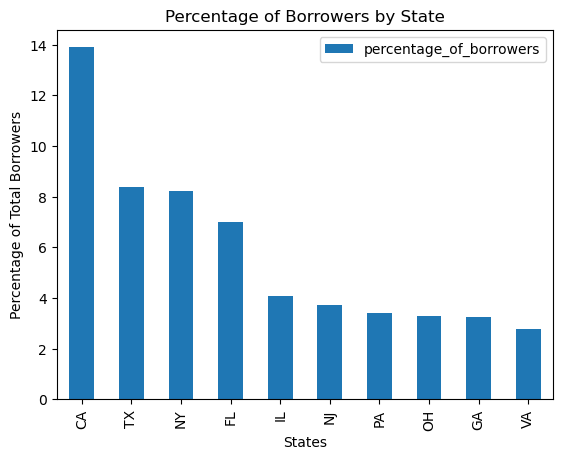

In [107]:
# Count the total number of borrowers
total_count = loan_clean['unique_num'].count()

# Group the borrowers by their state, then counting the number of borrowers in each state, dividing that by the total number of borrowers and multiplying by 100 to obtain the
# percentage of borrowers in each state.
borr_state = loan_clean.groupby('addr_state')['unique_num'].agg(['count']).div(total_count).multiply(100).sort_values(by='count', ascending=False)

# Renaming the 'count' column to 'percentage_of_borrowers' to more accurately represent the column data
borr_state = borr_state.rename(columns={'count': 'percentage_of_borrowers'})

# Showing the top 10 states with the largest number of borrowers
borr_state.head(10).plot(kind='bar');
plt.title("Percentage of Borrowers by State")
plt.xlabel("States")
plt.ylabel("Percentage of Total Borrowers");

# Almost 14% of all borrowers are from California, followed by 8.4% in Texas, 8.2% in New York, and 7% in Florida. Apart from these 4 states, all other states constitute less than
# 5% of the total portfolio.

In [109]:
borr_state.head(10)

,percentage_of_borrowers
addr_state,
CA,13.894308
TX,8.392051
NY,8.236059
FL,7.007049
IL,4.084250
NJ,3.719137
PA,3.405356
OH,3.313578
GA,3.270985


In [64]:
borr_state['percentage_of_borrowers'].head(4).sum()

# California, Texas, New York, and Florida constitute 37.5% of the total portfolio.

37.52946692638673

In [65]:
borr_state['percentage_of_borrowers'].head(10).sum()

# The top 10 states in terms of number of borrowers account for almost 60% of the portfolio of borrowers.

58.11534507200141

**Is there any concentration of delinquency in terms of geographic location?**

In [66]:
# Create a function to encode 'acc_now_delinq' to 1 for delinquent and 0 for non-delinquent (to use as the target/result)

def delinq(delinq_count):
    if delinq_count != 0:
        return 1
    else:
        return 0

# Apply the 'acc_now_delinq' column which shows number of delinquent accounts to the function and assigning it to a new column 'delinq_status'
loan_clean['delinq_status'] = loan_clean.acc_now_delinq.apply(delinq)

In [67]:
# Grouping loans by states, then calculating the delinquency count and total loan count for each state
state_delinq_count = loan_clean.groupby('addr_state')['delinq_status'].agg(['sum', 'count'])

# Calculating the percentage of delinquencies per state
state_delinq_count['delinq_percent'] = (state_delinq_count['sum'] / state_delinq_count['count']) * 100

# Show top 10 states with highest percentage of delinquencies
state_delinq_count.sort_values(by='delinq_percent', ascending=False).head(10)

# The top 3 states with highest percentage of delinquencies are Connecticut, New Jersey, and Rhode Island

,sum,count,delinq_percent
addr_state,,,
CT,209,32074,0.651618
NJ,444,74482,0.596117
RI,50,8982,0.556669
TX,837,168065,0.498022
NY,820,164941,0.497147
DE,28,5637,0.496718
AR,70,14681,0.476807
NE,33,7195,0.458652
MA,210,46634,0.450315


**What is the average annual income of the borrowers in the portfolio?**

In [68]:
loan_clean.annual_inc.median()

# The median annual income is $68,000

68000.0

In [110]:
loan_clean.annual_inc.mean()

# The mean annual income is slightly higher at $79,571 as it is skewed by the larger annual incomes in the portfolio (i.e. highest annual income is $110 million)

79571.13996282966

In [70]:
loan_clean.annual_inc.max()

# Highest annual income in the portfolio

999999.0

**Is there a correlation between annual income and delinquency?**

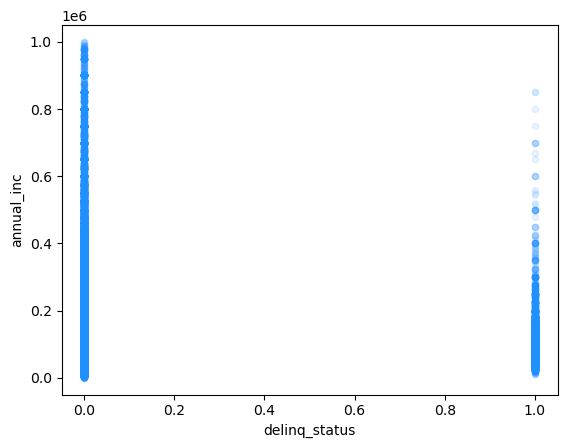

In [71]:
# Making a subset dataframe with only the required columns
income_delinq = loan_clean[['annual_inc', 'delinq_status']]

# Plotting the dataframe on a scatterplot
income_delinq.plot(kind='scatter', x='delinq_status', y='annual_inc', color='dodgerblue', alpha=0.1);

# The borrowers that are delinquent seem to have lower annual incomes when compared to the non-delinquent borrowers.

**What is the average debt-to-income ratio for borrowers in the portfolio?**

In [72]:
loan_clean.dti.median()

# The median debt-to-income ratio is 17.9%. This means that for every $100 of income, they have $17.90 in debt.

17.89

In [73]:
loan_clean.dti.mean()

# The mean debt-to-income ratio is 18.61%. This means that for every $100 of income, they have $18.61 in debt.

18.61450363489923

**Is there a correlation between debt-to-income ratio and delinquency?**

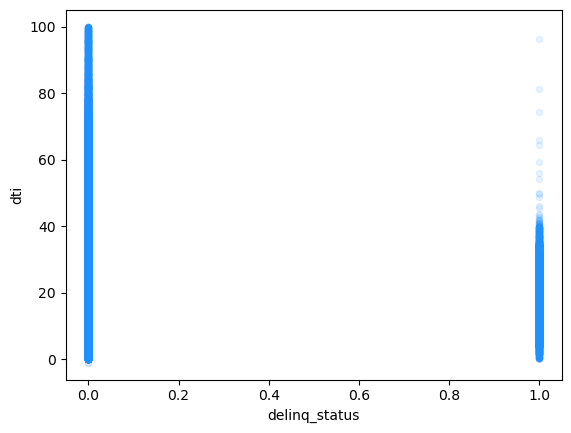

In [74]:
# Making a subset dataframe with only the required columns
dti_delinq = loan_clean[['dti', 'delinq_status']]

# Plotting the dataframe on a scatterplot
dti_delinq.plot(kind='scatter', x='delinq_status', y='dti', color='dodgerblue', alpha=0.1);

# The borrowers that are delinquent seem to have lower debt-to-income ratios compared to the non-delinquent borrowers

**Are the borrowers mostly homeowners?** 

In [75]:
total_home_ownership = loan_clean['home_ownership'].count()

loan_clean.groupby('home_ownership')['unique_num'].agg(['count']).div(total_home_ownership).multiply(100).sort_values(by='count', ascending=False)

# 49.6% of all borrowers have a mortgage, 39.8% are renting, 10.6% are home owners, with the rest not fitting into those categories (i.e. living with family/friends, etc.) 

,count
home_ownership,
MORTGAGE,49.609446
RENT,39.782311
OWN,10.567997
OTHER,0.040246


**Do the various homeowner status have different delinquency percentages?**

In [76]:
# Making a subset dataframe with only the required columns
homeowner_delinq = loan_clean[['home_ownership', 'delinq_status']]

# Calculating the total number of loans in each group (count) and the number of delinquencies in each group (sum)
homeowner_delinq_2 = homeowner_delinq.groupby('home_ownership')['delinq_status'].agg(['count', 'sum'])

# Calculating the percentage of delinquencies in each group
homeowner_delinq_2['percentage'] = (homeowner_delinq_2['sum'] / homeowner_delinq_2['count']) * 100

# Showing result and sorting by largest to smallest
homeowner_delinq_2.sort_values(by='percentage', ascending=False)

# There seems to be more delinquencies in the group that has mortgage and the group has owns their home.

,count,sum,percentage
home_ownership,,,
MORTGAGE,993513,4894,0.492595
OWN,211642,978,0.462101
OTHER,806,3,0.372208
RENT,796708,2298,0.288437


**How many borrowers are in each credit grade category?**

           percentage_of_grade
sub_grade                     
A1                    3.890858
A2                    3.063262
A3                    3.211364
A4                    4.161546
A5                    4.755404
B1                    5.580703
B2                    5.616505
B3                    5.763309
B4                    6.189690
B5                    6.204270
C1                    6.468618
C2                    5.809098
C3                    5.789923
C4                    5.713226
C5                    5.235613
D1                    3.622266
D2                    3.194038
D3                    2.827776
D4                    2.493423
D5                    2.101995
E1                    1.469389
E2                    1.313048
E3                    1.171387
E4                    0.999366
E5                    0.997519
F1                    0.586667
F2                    0.405459
F3                    0.342193
F4                    0.268292
F5                    0.226248
G1      

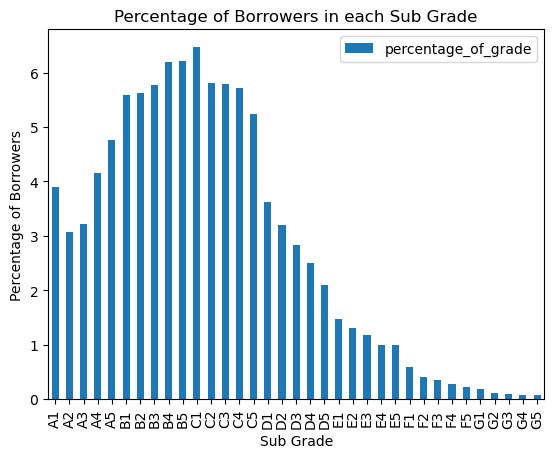

In [77]:
# Counting the total number of borrowers
total_grades = loan_clean.sub_grade.count()

# Grouping borrowers by credit grade, then counting the number of borrowers for each credit grade, divided by total borrowers, multiplied by 100 to obtain percentage of borrowers
# in each credit grade.
grades_percent = loan_clean.groupby('sub_grade')['unique_num'].agg(['count']).div(total_grades).multiply(100)

# Rename column 'count' to 'percentage_of_grade' to more accurately represent column data
grades_percent.rename(columns={'count': 'percentage_of_grade'}, inplace=True)

# Printing the final result
print(grades_percent)

# Plotting the final result on a bar chart
grades_percent.plot(kind='bar')
plt.ylabel('Percentage of Borrowers')
plt.xlabel('Sub Grade')
plt.title('Percentage of Borrowers in each Sub Grade');

# There is almost 4% of borrowers at A1. This then slightly declines before increasing towards the mid-tier credit grades. Most borrowers are in the mid-tier credit grades
# (i.e. between A4 to C5). Then, the number of borrowers decreases as the credit score deteriorates.

**What is the delinquency percentage for each sub grade?**

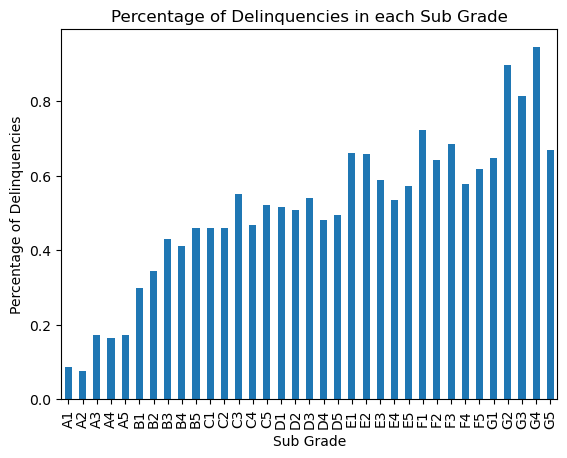

In [78]:
# Making a subset dataframe with only the required columns
subgrade_delinq = loan_clean[['sub_grade', 'delinq_status']]

# Calculating the total number of loans in each group (count) and the number of delinquencies in each group (sum)
subgrade_delinq_2 = subgrade_delinq.groupby('sub_grade')['delinq_status'].agg(['count', 'sum'])

# Calculating the percentage of delinquencies in each group
subgrade_delinq_2['percentage'] = (subgrade_delinq_2['sum'] / subgrade_delinq_2['count']) * 100

# Showing result and sorting by largest to smallest
subgrade_delinq_2['percentage'].plot(kind='bar')
plt.ylabel('Percentage of Delinquencies')
plt.xlabel('Sub Grade')
plt.title('Percentage of Delinquencies in each Sub Grade');

# As expected, the delinquencies increase as the sub grade worsens

**What is the percentage of delinquency in the portfolio?**

In [79]:
# Count the total number of borrowers
total_count_delinq = loan_clean.acc_now_delinq.count()

# Count the total number of borrowers who are delinquent
total_delinq = loan_clean.acc_now_delinq[loan_clean.acc_now_delinq != 0].count()

# Calculate the percentage of delinquent borrowers by dividing number of delinquent borrowers by the total borrowers then multiplying by 100
delinq_percent = (total_delinq / total_count_delinq) * 100

delinq_percent

# There is only a 0.4% of borrowers in the portfolio who are currently delinquent


0.40810538336589824

**What is the breakdown of loans by their purpose?**

In [80]:
# Count total number of loans
total_purpose = loan_clean.purpose.count()

# Group loans by their purpose, then count the number of loans in each purpose group, dividing that by total loans, then multiplying by 100 to obtain the percentage of
# loans in each purpose group, then sorting by largest to smallest
purpose_breakdown = loan_clean.groupby('purpose')['unique_num'].agg(['count']).div(total_purpose).multiply(100).sort_values(by='count', ascending=False)

# Renaming the 'count' column to 'purpose_percent' to more accurately represent column data
purpose_breakdown = purpose_breakdown.rename(columns={'count': 'purpose_percent'})

# 57% of all loans were for debt consolidation (i.e. using a new loan to pay off other smaller loans for easier financial management), 23.3% were for credit card payments, 6.5%
# were for home improvement costs, 5.9% for "other".

purpose_breakdown

,purpose_percent
purpose,
debt_consolidation,57.047470
credit_card,23.264753
home_improvement,6.491937
other,5.899577
major_purchase,2.150330
medical,1.150964
car,0.990179
small_business,0.985385
vacation,0.661068


In [81]:
# Adding the 'sum' column to show the total of loan amount by purpose categories
purpose_breakdown['sum'] = loan_clean.groupby('purpose')['unique_num'].agg(['sum']).sort_values(by='sum', ascending=False)
purpose_breakdown

# The top 3 purpose categories by total loan amount are debt consolidation, credit card, and home improvement

,purpose_percent,sum
purpose,,
debt_consolidation,57.047470,1292606611702
credit_card,23.264753,505470740733
home_improvement,6.491937,143072554862
other,5.899577,127102618156
major_purchase,2.150330,46552552336
medical,1.150964,25245500070
car,0.990179,21812222470
small_business,0.985385,22644278100
vacation,0.661068,14371140456


**Is there a certain loan purpose that has higher correlation with delinquency?**

In [82]:
# Grouping loans by their purpose, then counting the number of loans in each group
purpose_group_total = loan_clean.groupby('purpose')['acc_now_delinq'].agg(['count'])

# Counting the number of delinquencies in each purpose group then adding to a new column 'delinq_count'
purpose_group_total['delinq_count'] = loan_clean[loan_clean.acc_now_delinq != 0].groupby('purpose')['acc_now_delinq'].agg(['count'])

# Calculating the percentage of delinquencies by dividing the number of delinquencies by the total number of loans in each purpose group, then adding to new column 'delinq_percent'
purpose_group_total['delinq_percent'] = round((purpose_group_total['delinq_count'] / purpose_group_total['count']) * 100,2)

# Sorting the table by percentage of delinquencies from largest to smallest
purpose_group_total.sort_values(by='delinq_percent', ascending=False)

# The purpose categories that have higher percentage of delinquency are renewable energy, home improvement, and small businesses.

,count,delinq_count,delinq_percent
purpose,,,
renewable_energy,1179,8.0,0.68
home_improvement,130012,683.0,0.53
small_business,19734,103.0,0.52
medical,23050,118.0,0.51
moving,13109,64.0,0.49
car,19830,91.0,0.46
major_purchase,43064,194.0,0.45
other,118149,521.0,0.44
debt_consolidation,1142472,4850.0,0.42


**What percentage of the loan portfolio are customers that have a hardship flag assigned (customers that have requested for a restructuring of repayments plan)?**

In [83]:
# Count total number of loans
total_hardship = loan_clean.hardship_flag.count()

# Count total number of loans with a hardship flag
hardship_count = loan_clean.hardship_flag[loan_clean.hardship_flag == 'Y'].count()

# Calculate percentage of hardship loans by dividing number of hardship loans with total number of loans
hardship_percent = (hardship_count / total_hardship) * 100

hardship_percent

# Only 0.04% of total borrowers have requested for a restructuring of their repayment plan.

0.040146424596376136

**Is there a higher delinquency rate among the customers who have hardship flag assigned?** 

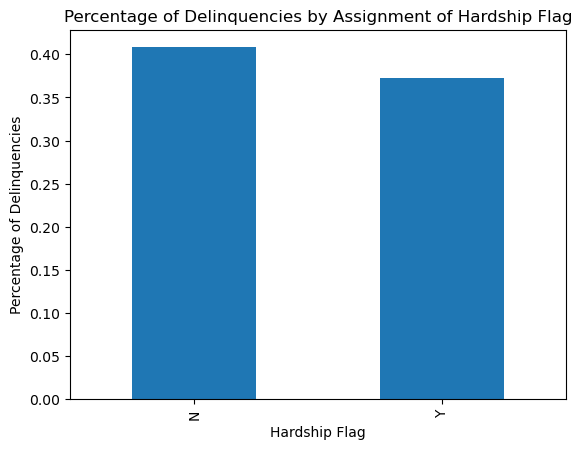

In [84]:
# Making a subset dataframe with only the required columns
hardship_delinq = loan_clean[['hardship_flag', 'delinq_status']]

# Calculating the total number of loans in each group (count) and the number of delinquencies in each group (sum)
hardship_delinq_2 = hardship_delinq.groupby('hardship_flag')['delinq_status'].agg(['count', 'sum'])

# Calculating the percentage of delinquencies in each group
hardship_delinq_2['percentage'] = (hardship_delinq_2['sum'] / hardship_delinq_2['count']) * 100

# Showing result and sorting by largest to smallest
hardship_delinq_2['percentage'].plot(kind='bar')
plt.ylabel('Percentage of Delinquencies')
plt.xlabel('Hardship Flag')
plt.title('Percentage of Delinquencies by Assignment of Hardship Flag');

# The percentage of delinquencies appear to be higher within the group with no hardship flag assigned.

**Is there a correlation between the number of credit lines a borrower has and delinquency?**

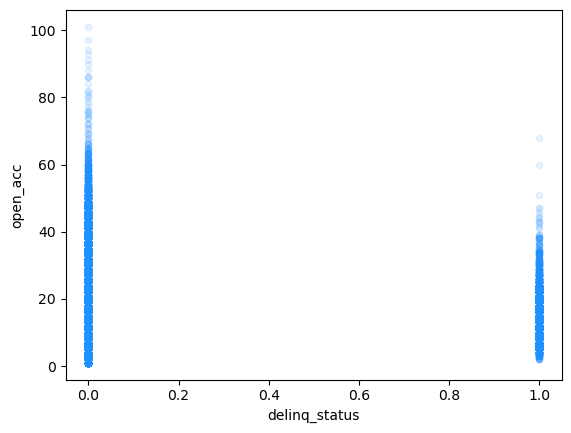

In [85]:
# Making a subset dataframe with only the required columns
openacc_delinq = loan_clean[['open_acc', 'delinq_status']]

# Plotting the dataframe on a scatterplot
openacc_delinq.plot(kind='scatter', x='delinq_status', y='open_acc', color='dodgerblue', alpha=0.1);

# It seems that the delinquent borrowers have a lower number of credit lines compared to the non-deliquent borrowers.

**Is there a correlation between a borrower's public derogatory records and delinquency?**

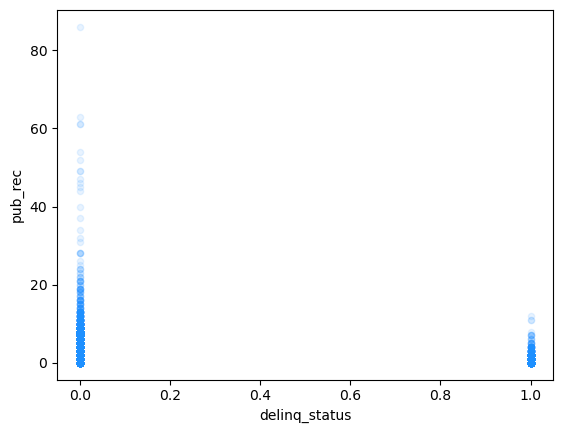

In [86]:
# Making a subset dataframe with only the required columns
pubrec_delinq = loan_clean[['pub_rec', 'delinq_status']]

# Plotting the dataframe on a scatterplot
pubrec_delinq.plot(kind='scatter', x='delinq_status', y='pub_rec', color='dodgerblue', alpha=0.1);

# It seems that the delinquent borrowers have a lower number of derogatory public records.

**Is there a correlation between a borrower's bankruptcy records and delinquency?**

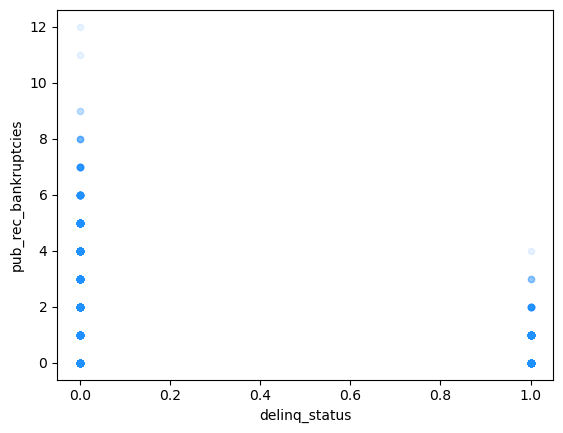

In [87]:
# Making a subset dataframe with only the required columns
bankrupt_delinq = loan_clean[['pub_rec_bankruptcies', 'delinq_status']]

# Plotting the dataframe on a scatterplot
bankrupt_delinq.plot(kind='scatter', x='delinq_status', y='pub_rec_bankruptcies', color='dodgerblue', alpha=0.1);

# There is no clear indication that higher bankruptcy records is correlated to higher delinquency.

**Is there a correlation between the number of times a borrower has been delinquent in the past 24 months and the borrower's current delinquency status?**

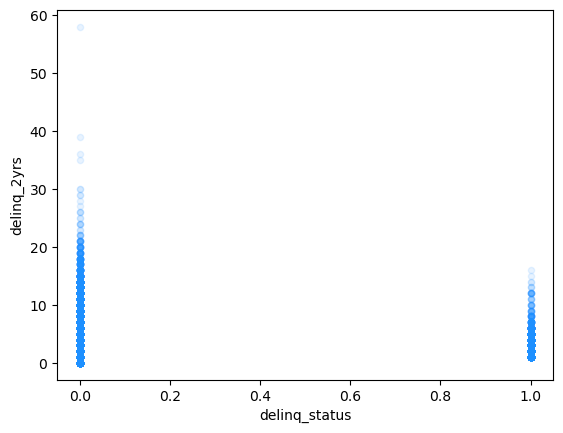

In [88]:
# Making a subset dataframe with only the required columns
d2yrs_delinq = loan_clean[['delinq_2yrs', 'delinq_status']]

# Plotting the dataframe on a scatterplot
d2yrs_delinq.plot(kind='scatter', x='delinq_status', y='delinq_2yrs', color='dodgerblue', alpha=0.1);

# The delinquent borrowers have a lower count of delinquencies in the past 2 years.

**Is there a correlation between a borrower's hardcore use of their bank card credit line (above 75%) and delinquency?**

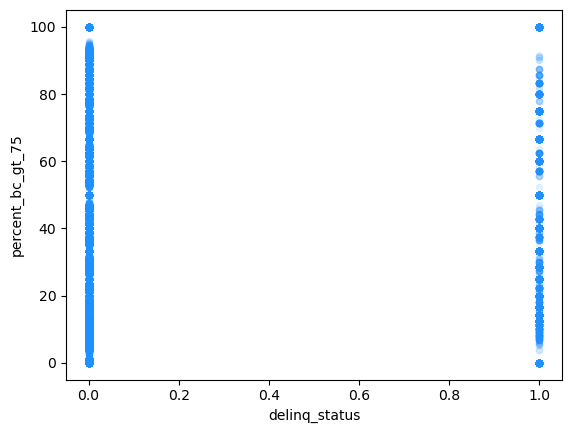

In [89]:
# Making a subset dataframe with only the required columns
bc75_delinq = loan_clean[['percent_bc_gt_75', 'delinq_status']]

# Plotting the dataframe on a scatterplot
bc75_delinq.plot(kind='scatter', x='delinq_status', y='percent_bc_gt_75', color='dodgerblue', alpha=0.1);

# There is no clear indication that the higher usage of bank card credit line has any correlation to delinquency.

**Is there a correlation between interest rates and delinquency?**

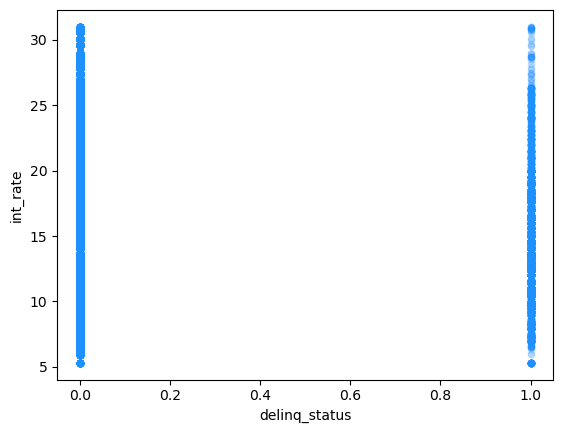

In [90]:
# Making a subset dataframe with only the required columns
int_delinq = loan_clean[['int_rate', 'delinq_status']]

# Plotting the dataframe on a scatterplot
int_delinq.plot(kind='scatter', x='delinq_status', y='int_rate', color='dodgerblue', alpha=0.1);

# There is no clear indication that the higher interest rates has any correlation to delinquency.

**Does a borrower's employment length has any impact on delinquency?**

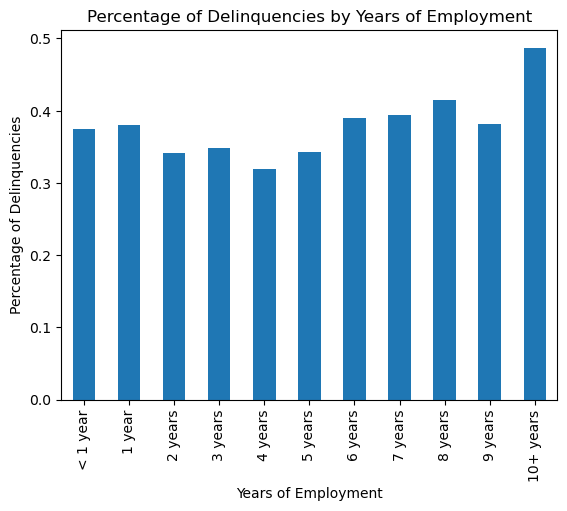

In [91]:
# Making a subset dataframe with only the required columns
emplen_delinq = loan_clean[['emp_length', 'delinq_status']]

# Calculating the total number of loans in each group (count) and the number of delinquencies in each group (sum)
emplen_delinq_2 = emplen_delinq.groupby('emp_length')['delinq_status'].agg(['count', 'sum'])

# Calculating the percentage of delinquencies in each group
emplen_delinq_2['percentage'] = (emplen_delinq_2['sum'] / emplen_delinq_2['count']) * 100


# Re-ordering the results

def custom_sort(x):
    order = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
             '8 years': 8, '9 years': 9, '10+ years': 10}
    return order[x]

emplen_delinq_2 = emplen_delinq_2.reset_index()
emplen_delinq_2['custom_order'] = emplen_delinq_2['emp_length'].apply(custom_sort)
emplen_delinq_2 = emplen_delinq_2.sort_values(by='custom_order')
emplen_delinq_2.set_index('emp_length', inplace=True)

# Showing result and sorting by largest to smallest
emplen_delinq_2['percentage'].plot(kind='bar')
plt.ylabel('Percentage of Delinquencies')
plt.xlabel('Years of Employment')
plt.title('Percentage of Delinquencies by Years of Employment');

# The percentage of delinquencies appear to start high when years of employment is low, then decreases around 4 years before continue increasing as years of employment increase.

**What is the breakdown of loans by year originated?**

In [92]:
# Check the format for issue_d (which is the column showing when the loan was issued)
loan_clean.dtypes

unique_num                  int64
loan_amnt                   int64
term                       object
int_rate                  float64
installment               float64
grade                      object
sub_grade                  object
emp_title                  object
emp_length                 object
home_ownership             object
annual_inc                float64
issue_d                    object
loan_status                object
purpose                    object
addr_state                 object
dti                       float64
delinq_2yrs               float64
earliest_cr_line           object
mths_since_last_delinq    float64
open_acc                  float64
pub_rec                   float64
revol_util                float64
total_acc                 float64
total_rec_prncp           float64
application_type           object
annual_inc_joint          float64
dti_joint                 float64
acc_now_delinq            float64
tot_cur_bal               float64
total_rev_hi_l

In [93]:
# Converting 'issue_d' to datetime format
loan_clean['issue_d'] = pd.to_datetime(loan_clean['issue_d'], format = "%b-%Y")

# Converting 'earlist_cr_line' to datetime format
loan_clean['earliest_cr_line'] = pd.to_datetime(loan_clean['earliest_cr_line'], format = "%b-%Y")

loan_clean

,unique_num,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,total_rec_prncp,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_tl_30dpd,num_tl_90g_dpd_24m,percent_bc_gt_75,pub_rec_bankruptcies,total_bal_ex_mort,revol_bal_joint,sec_app_mort_acc,hardship_flag,delinq_status
0,0,2500,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,2018-12-01,Current,debt_consolidation,NY,18.24,0.0,2001-04-01,999.0,9.0,1.0,10.3,34.0,113.98,Individual,NaN,NaN,0.0,16901.0,42000.0,1878.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16901.0,NaN,NaN,N,0
1,1,30000,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,2018-12-01,Current,debt_consolidation,LA,26.52,0.0,1987-06-01,71.0,13.0,1.0,24.2,44.0,612.25,Individual,NaN,NaN,0.0,321915.0,50800.0,24763.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,99468.0,NaN,NaN,N,0
2,2,5000,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,2018-12-01,Current,debt_consolidation,MI,10.51,0.0,2011-04-01,999.0,8.0,0.0,19.1,13.0,212.79,Individual,NaN,NaN,0.0,110299.0,24100.0,18383.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,11749.0,NaN,NaN,N,0
3,3,4000,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,2018-12-01,Current,debt_consolidation,WA,16.74,0.0,2006-02-01,999.0,10.0,0.0,78.1,13.0,168.07,Individual,NaN,NaN,0.0,305049.0,7000.0,30505.0,0.0,3.0,0.0,0.0,0.0,100.0,0.0,36151.0,NaN,NaN,N,0
4,4,30000,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,2018-12-01,Current,debt_consolidation,MD,26.35,0.0,2000-12-01,999.0,12.0,0.0,3.6,26.0,660.98,Individual,NaN,NaN,0.0,116007.0,23100.0,9667.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,29674.0,NaN,NaN,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002664,2260662,30000,60 months,30.75,984.47,F,F5,Sales,6 years,MORTGAGE,100000.0,2017-10-01,Current,debt_consolidation,FL,22.13,0.0,1996-08-01,999.0,9.0,0.0,66.9,14.0,4201.22,Individual,NaN,NaN,0.0,174805.0,28700.0,19423.0,0.0,2.0,0.0,0.0,0.0,50.0,0.0,68680.0,NaN,NaN,N,0
2002665,2260663,12000,60 months,14.08,279.72,C,C3,house keeper,10+ years,MORTGAGE,58000.0,2017-10-01,Current,debt_consolidation,VT,20.88,0.0,2004-01-01,999.0,12.0,0.0,39.2,34.0,3312.80,Individual,NaN,NaN,0.0,45212.0,24500.0,4110.0,0.0,2.0,0.0,0.0,0.0,66.7,0.0,45212.0,NaN,NaN,N,0
2002666,2260664,12000,60 months,25.82,358.01,E,E4,Skilled Labor,< 1 year,MORTGAGE,30000.0,2017-10-01,Fully Paid,debt_consolidation,OR,19.28,3.0,2003-03-01,13.0,10.0,0.0,20.2,26.0,12000.00,Joint App,135000.0,7.36,0.0,346404.0,17300.0,34640.0,0.0,4.0,2.0,0.0,0.0,50.0,0.0,12928.0,13710.0,4.0,N,0
2002667,2260665,10000,36 months,11.99,332.10,B,B5,Teacher,10+ years,OWN,64000.0,2017-10-01,Current,debt_consolidation,IL,12.96,0.0,1995-02-01,999.0,6.0,0.0,70.9,13.0,4006.73,Individual,NaN,NaN,0.0,189735.0,10000.0,31623.0,0.0,3.0,0.0,0.0,0.0,100.0,0.0,36448.0,NaN,NaN,N,0


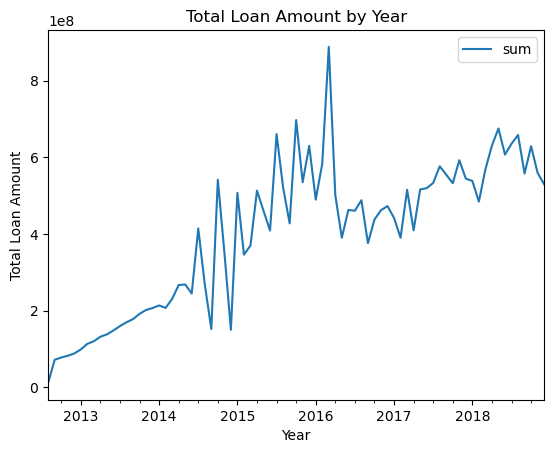

In [94]:
loan_clean.groupby('issue_d')['loan_amnt'].agg(['sum']).plot()
plt.ylabel('Total Loan Amount')
plt.xlabel('Year')
plt.title('Total Loan Amount by Year');

In [95]:
loan_date_index = loan_clean.set_index('issue_d')

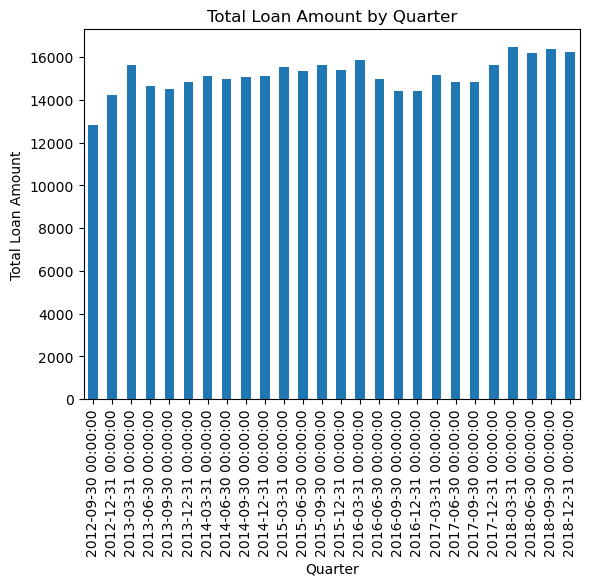

In [96]:
# Loan origination by quarter originated

loan_date_index.resample('Q')['loan_amnt'].mean().plot(kind='bar')
plt.ylabel('Total Loan Amount')
plt.xlabel('Quarter')
plt.title('Total Loan Amount by Quarter');

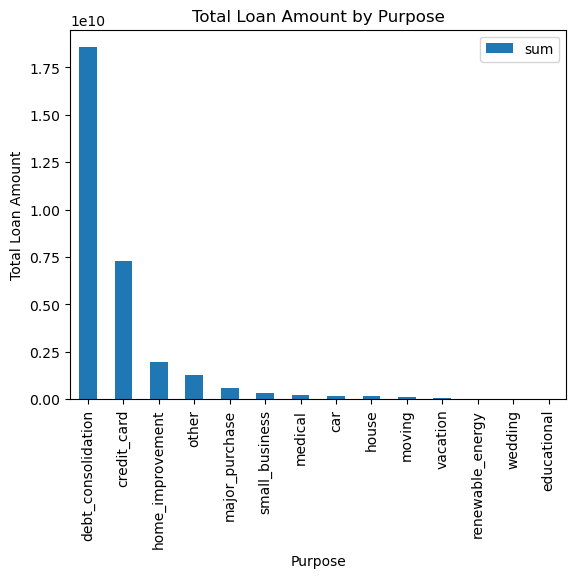

In [97]:
loan_date_index.groupby('purpose')['loan_amnt'].agg(['sum']).sort_values(by='sum', ascending=False).plot(kind='bar')
plt.ylabel('Total Loan Amount')
plt.xlabel('Purpose')
plt.title('Total Loan Amount by Purpose');

In [98]:
loan_clean

,unique_num,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,total_rec_prncp,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_tl_30dpd,num_tl_90g_dpd_24m,percent_bc_gt_75,pub_rec_bankruptcies,total_bal_ex_mort,revol_bal_joint,sec_app_mort_acc,hardship_flag,delinq_status
0,0,2500,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,2018-12-01,Current,debt_consolidation,NY,18.24,0.0,2001-04-01,999.0,9.0,1.0,10.3,34.0,113.98,Individual,NaN,NaN,0.0,16901.0,42000.0,1878.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16901.0,NaN,NaN,N,0
1,1,30000,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,2018-12-01,Current,debt_consolidation,LA,26.52,0.0,1987-06-01,71.0,13.0,1.0,24.2,44.0,612.25,Individual,NaN,NaN,0.0,321915.0,50800.0,24763.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,99468.0,NaN,NaN,N,0
2,2,5000,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,2018-12-01,Current,debt_consolidation,MI,10.51,0.0,2011-04-01,999.0,8.0,0.0,19.1,13.0,212.79,Individual,NaN,NaN,0.0,110299.0,24100.0,18383.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,11749.0,NaN,NaN,N,0
3,3,4000,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,2018-12-01,Current,debt_consolidation,WA,16.74,0.0,2006-02-01,999.0,10.0,0.0,78.1,13.0,168.07,Individual,NaN,NaN,0.0,305049.0,7000.0,30505.0,0.0,3.0,0.0,0.0,0.0,100.0,0.0,36151.0,NaN,NaN,N,0
4,4,30000,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,2018-12-01,Current,debt_consolidation,MD,26.35,0.0,2000-12-01,999.0,12.0,0.0,3.6,26.0,660.98,Individual,NaN,NaN,0.0,116007.0,23100.0,9667.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,29674.0,NaN,NaN,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002664,2260662,30000,60 months,30.75,984.47,F,F5,Sales,6 years,MORTGAGE,100000.0,2017-10-01,Current,debt_consolidation,FL,22.13,0.0,1996-08-01,999.0,9.0,0.0,66.9,14.0,4201.22,Individual,NaN,NaN,0.0,174805.0,28700.0,19423.0,0.0,2.0,0.0,0.0,0.0,50.0,0.0,68680.0,NaN,NaN,N,0
2002665,2260663,12000,60 months,14.08,279.72,C,C3,house keeper,10+ years,MORTGAGE,58000.0,2017-10-01,Current,debt_consolidation,VT,20.88,0.0,2004-01-01,999.0,12.0,0.0,39.2,34.0,3312.80,Individual,NaN,NaN,0.0,45212.0,24500.0,4110.0,0.0,2.0,0.0,0.0,0.0,66.7,0.0,45212.0,NaN,NaN,N,0
2002666,2260664,12000,60 months,25.82,358.01,E,E4,Skilled Labor,< 1 year,MORTGAGE,30000.0,2017-10-01,Fully Paid,debt_consolidation,OR,19.28,3.0,2003-03-01,13.0,10.0,0.0,20.2,26.0,12000.00,Joint App,135000.0,7.36,0.0,346404.0,17300.0,34640.0,0.0,4.0,2.0,0.0,0.0,50.0,0.0,12928.0,13710.0,4.0,N,0
2002667,2260665,10000,36 months,11.99,332.10,B,B5,Teacher,10+ years,OWN,64000.0,2017-10-01,Current,debt_consolidation,IL,12.96,0.0,1995-02-01,999.0,6.0,0.0,70.9,13.0,4006.73,Individual,NaN,NaN,0.0,189735.0,10000.0,31623.0,0.0,3.0,0.0,0.0,0.0,100.0,0.0,36448.0,NaN,NaN,N,0


**Is there a correlation between borrowers that have more mortgage accounts and delinquency?**

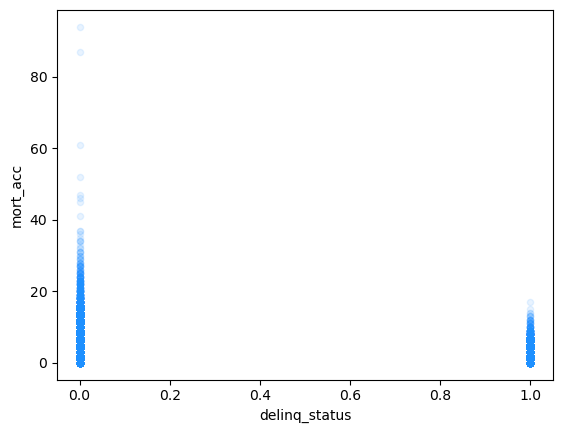

In [99]:
# Making a subset dataframe with only the required columns
mortacc_delinq = loan_clean[['mort_acc', 'delinq_status']]

# Plotting the dataframe on a scatterplot
mortacc_delinq.plot(kind='scatter', x='delinq_status', y='mort_acc', color='dodgerblue', alpha=0.1);

# The delinquent borrowers have a lower count of mortgage accounts.

**Is there a correlation between the current delinquent borrowers and the length of time that has passed since they were last delinquent?**

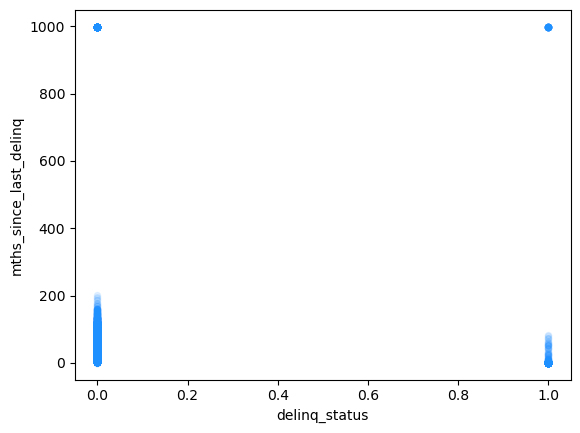

In [100]:
# Making a subset dataframe with only the required columns
mthssincelast_delinq = loan_clean[['mths_since_last_delinq', 'delinq_status']]

# Plotting the dataframe on a scatterplot
mthssincelast_delinq.plot(kind='scatter', x='delinq_status', y='mths_since_last_delinq', color='dodgerblue', alpha=0.1);

# The delinquent borrowers have had delinquencies more recently compared to the non-delinquent borrowers.

In [101]:
loan_clean.groupby('mths_since_last_delinq')['unique_num'].agg(['count'])

,count
mths_since_last_delinq,
0.0,1691
1.0,6582
2.0,8968
3.0,11938
4.0,14156
...,...
188.0,2
192.0,1
195.0,1


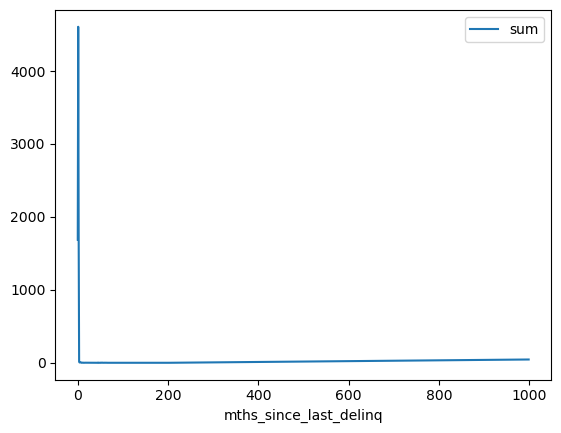

In [102]:
loan_clean.groupby('mths_since_last_delinq')['delinq_status'].agg(['sum']).plot();

In [103]:
loan_clean[(loan_clean['mths_since_last_delinq'] == 0) & (loan_clean['delinq_status'] != 0)].count()

unique_num                1687
loan_amnt                 1687
term                      1687
int_rate                  1687
installment               1687
grade                     1687
sub_grade                 1687
emp_title                 1687
emp_length                1687
home_ownership            1687
annual_inc                1687
issue_d                   1687
loan_status               1687
purpose                   1687
addr_state                1687
dti                       1687
delinq_2yrs               1687
earliest_cr_line          1687
mths_since_last_delinq    1687
open_acc                  1687
pub_rec                   1687
revol_util                1687
total_acc                 1687
total_rec_prncp           1687
application_type          1687
annual_inc_joint            34
dti_joint                   34
acc_now_delinq            1687
tot_cur_bal               1687
total_rev_hi_lim          1687
avg_cur_bal               1687
delinq_amnt               1687
mort_acc

In [104]:
loan_clean[(loan_clean['delinq_status'] != 0)].count()

unique_num                8173
loan_amnt                 8173
term                      8173
int_rate                  8173
installment               8173
grade                     8173
sub_grade                 8173
emp_title                 8173
emp_length                8173
home_ownership            8173
annual_inc                8173
issue_d                   8173
loan_status               8173
purpose                   8173
addr_state                8173
dti                       8173
delinq_2yrs               8173
earliest_cr_line          8173
mths_since_last_delinq    8173
open_acc                  8173
pub_rec                   8173
revol_util                8173
total_acc                 8173
total_rec_prncp           8173
application_type          8173
annual_inc_joint           162
dti_joint                  162
acc_now_delinq            8173
tot_cur_bal               8173
total_rev_hi_lim          8173
avg_cur_bal               8173
delinq_amnt               8173
mort_acc

**Is there a correlation between the number of times a borrower has defaulted and delinquency?**

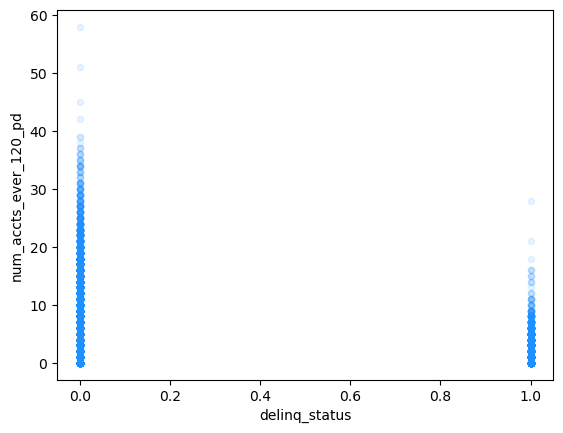

In [105]:
# Making a subset dataframe with only the required columns
default_delinq = loan_clean[['num_accts_ever_120_pd', 'delinq_status']]

# Plotting the dataframe on a scatterplot
default_delinq.plot(kind='scatter', x='delinq_status', y='num_accts_ever_120_pd', color='dodgerblue', alpha=0.1);

# The delinquent borrowers have a lower count of defaults in their credit history.